<a href="https://colab.research.google.com/github/lsylcy0307/Accented-speech-transcription/blob/main/Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# conda install -c conda-forge keras
# conda install -c conda-forge seaborn
# conda install -c conda-forge librosa
!pip install librosa
!pip install pandas==0.24.0

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import string
import IPython.display as ipd  # To play sound in the notebook

Using TensorFlow backend.


In [ ]:
conda list

# packages in environment at /opt/anaconda3/envs/tensorflow:
#
# Name                    Version                   Build  Channel
_tflow_select             2.3.0                       mkl  
absl-py                   0.11.0           py37hecd8cb5_0  
appdirs                   1.4.4              pyh9f0ad1d_0    conda-forge
appnope                   0.1.0                    py37_0  
argon2-cffi               20.1.0           py37haf1e3a3_1  
astor                     0.8.1                    py37_0  
async_generator           1.10             py37h28b3542_0  
attrs                     20.2.0                     py_0  
audioread                 2.1.9            py37hf985489_0    conda-forge
backcall                  0.2.0                      py_0  
bayesian-optimization     1.2.0                    pypi_0    pypi
blas                      1.0                         mkl  
bleach                    3.2.1                      py_0  
boto3                     1.16.7             pyhd3eb1b0_0 

In [ ]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import os

In [ ]:
os.chdir('/Users/suyeonlee/.kaggle')

In [ ]:
#load the data 
df_mod = pd.read_csv("~/.kaggle/speakers_all_modified.csv", header=0)
# Check the data
print(df_mod.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df_mod.head())

#speakers_all.csv not in .kaggle folder

(172, 9) is the shape of the dataset
------------------------
   age  age_onset                  birthplace filename native_language  \
0   27        2.0  nagpur, maharashtra, india   hindi1           hindi   
1   19       10.5            new delhi, india  hindi10           hindi   
2   20        4.0           chandigarh, india  hindi11           hindi   
3   25        4.0            allahabad, india  hindi12           hindi   
4   43       13.0               jaipur, india  hindi13           hindi   

      sex  speakerid country  file_missing?  
0    male        207   india          False  
1  female       1202   india          False  
2    male       1437   india          False  
3  female       1440   india          False  
4  female       1633   india          False  


In [ ]:
#load the data 
rus_all = pd.read_csv("~/.kaggle/russian_all.csv", header=0)
# Check the data
print(rus_all.shape, 'is the shape of the dataset') 
print('------------------------') 
print(rus_all.head())

#speakers_all.csv not in .kaggle folder

(48, 12) is the shape of the dataset
------------------------
   age  age_onset               birthplace   filename native_language     sex  \
0   37         36  nizhni novgorod, russia   russian1         russian    male   
1   20          5           moscow, russia  russian10         russian  female   
2   54         13      ola magadan, russia  russian11         russian    male   
3   62         53   st. petersburg, russia  russian12         russian    male   
4   26         10           moscow, russia  russian13         russian    male   

   speakerid country  file_missing?  Unnamed: 9  Unnamed: 10  Unnamed: 11  
0        299  russia          False         NaN          NaN          NaN  
1        300  russia          False         NaN          NaN          NaN  
2        301  russia          False         NaN          NaN          NaN  
3        460  russia          False         NaN          NaN          NaN  
4        472  russia          False         NaN          NaN          N

In [ ]:
#load the data
df = pd.read_csv("~/.kaggle/speakers_all.csv", header=0)
# Check the data
print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

#speakers_all.csv not in .kaggle folder

(2172, 12) is the shape of the dataset
------------------------
    age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0        788   senegal           True         NaN          NaN         NaN  
1       1953  cameroon           True         NaN          NaN         NaN  
2       1037   nigeria           True         NaN          NaN         NaN  
3       1165     haiti           True         NaN          NaN         NaN  
4       1166     haiti           True         NaN          NaN         NaN  


In [ ]:
df.groupby("native_language")['age'].describe().sort_values(by=['count'],ascending=False).head(10)
#note: more native_language(214 rows) than country-of-orgin(176 rows)

,count,mean,std,min,25%,50%,75%,max
native_language,,,,,,,,
english,579.0,34.482729,16.734510,6.0,21.00,29.0,44.00,90.0
spanish,162.0,34.129630,13.972528,17.0,23.00,30.0,45.00,80.0
arabic,102.0,30.950980,12.047248,18.0,21.25,28.0,38.00,70.0
mandarin,65.0,30.015385,8.193924,18.0,24.00,28.0,34.00,53.0
french,63.0,33.333333,16.246091,18.0,21.00,27.0,39.00,78.0
korean,52.0,33.230769,12.718083,18.0,22.00,29.5,43.50,62.0
russian,48.0,34.145833,15.533066,18.0,24.00,28.5,37.00,84.0
portuguese,48.0,29.625000,10.487328,18.0,22.00,26.0,36.25,65.0
dutch,47.0,28.765957,11.876562,18.0,21.00,23.0,35.50,68.0


In [ ]:
fname3 = 'recordings/recordings/' + 'russian8.mp3'   
ipd.Audio(fname3)

<AxesSubplot:>

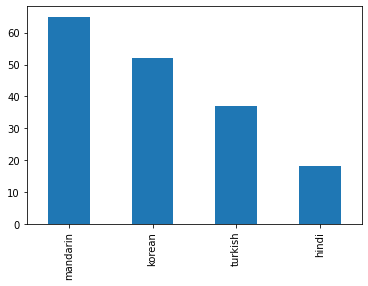

In [ ]:
df_mod['native_language'].value_counts().plot(kind='bar')

In [ ]:
#Korean
kr_phonemes = []
kr_word_total = []
kr_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("korean_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    kr_word_total.append(kr_word_list)
                word_counter = 0
                new_person = True
                kr_phonemes.append(kr_word_total)
                kr_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    kr_word_total.append(kr_word_list)
                    kr_word_list = []
                    new_word = True
                    kr_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    kr_word_list.append(words[2])
        counter = counter+1
        
kr_phonemes[0].pop(0)
for i in kr_phonemes:
    i.pop(0)

In [ ]:
#hindi
hd_phonemes = []
hd_word_total = []
hd_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("hindi_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    hd_word_total.append(hd_word_list)
                word_counter = 0
                new_person = True
                hd_phonemes.append(hd_word_total)
                hd_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    hd_word_total.append(hd_word_list)
                    hd_word_list = []
                    new_word = True
                    hd_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    hd_word_list.append(words[2])
        counter = counter+1
        
hd_phonemes[0].pop(0)
for i in hd_phonemes:
    i.pop(0)

In [ ]:
#mandarin
md_phonemes = []
md_word_total = []
md_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("mandarin_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    md_word_total.append(md_word_list)
                word_counter = 0
                new_person = True
                md_phonemes.append(md_word_total)
                md_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    md_word_total.append(md_word_list)
                    md_word_list = []
                    new_word = True
                    md_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    md_word_list.append(words[2])
        counter = counter+1

md_phonemes[0].pop(0)
for i in md_phonemes:
    i.pop(0)

In [ ]:
#turkey
tk_phonemes = []
tk_word_total = []
tk_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("turkish_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    tk_word_total.append(tk_word_list)
                word_counter = 0
                new_person = True
                tk_phonemes.append(tk_word_total)
                tk_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    tk_word_total.append(tk_word_list)
                    tk_word_list = []
                    new_word = True
                    tk_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    tk_word_list.append(words[2])
        counter = counter+1
        
tk_phonemes[0].pop(0)
for i in tk_phonemes:
    i.pop(0)

In [ ]:
#russian
rs_phonemes = []
rs_word_total = []
rs_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("russian_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    rs_word_total.append(rs_word_list)
                word_counter = 0
                new_person = True
                rs_phonemes.append(rs_word_total)
                rs_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    rs_word_total.append(rs_word_list)
                    rs_word_list = []
                    new_word = True
                    rs_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    rs_word_list.append(words[2])
        counter = counter+1
        
rs_phonemes[0].pop(0)
for i in rs_phonemes:
    i.pop(0)

In [ ]:
len(rs_phonemes[0])

68

In [ ]:
#turkey time frames
timeFrame_all = []
timeFrame_person = []
timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("turkish_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    timeFrame_person.append(timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                timeFrame_all.append(timeFrame_person) #add all. record of the person to the total
                timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    timeFrame_person.append(timeFrame) 
                    timeFrame = []
                    new_word = True
                    timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    timeFrame.append([words[0], words[1]])
        counter = counter+1
        
timeFrame_all[0].pop(0)
for i in timeFrame_all:
    i.pop(0)

In [ ]:
len(timeFrame_all[0])

68

In [ ]:
#korea time frames
kr_timeFrame_all = []
kr_timeFrame_person = []
kr_timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("korean_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    kr_timeFrame_person.append(kr_timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                kr_timeFrame_all.append(kr_timeFrame_person) #add all. record of the person to the total
                kr_timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    kr_timeFrame_person.append(kr_timeFrame) 
                    kr_timeFrame = []
                    new_word = True
                    kr_timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    kr_timeFrame.append([words[0], words[1]])
        counter = counter+1
        
kr_timeFrame_all[0].pop(0)
for i in kr_timeFrame_all:
    i.pop(0)

In [ ]:
#mandarin time frames
md_timeFrame_all = []
md_timeFrame_person = []
md_timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("mandarin_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    md_timeFrame_person.append(md_timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                md_timeFrame_all.append(md_timeFrame_person) #add all. record of the person to the total
                md_timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    md_timeFrame_person.append(md_timeFrame) 
                    md_timeFrame = []
                    new_word = True
                    md_timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    md_timeFrame.append([words[0], words[1]])
        counter = counter+1
        
md_timeFrame_all[0].pop(0)
for i in md_timeFrame_all:
    i.pop(0)

In [ ]:
#hindi time frames
hd_timeFrame_all = []
hd_timeFrame_person = []
hd_timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("hindi_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    hd_timeFrame_person.append(hd_timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                hd_timeFrame_all.append(hd_timeFrame_person) #add all. record of the person to the total
                hd_timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    hd_timeFrame_person.append(hd_timeFrame) 
                    hd_timeFrame = []
                    new_word = True
                    hd_timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    hd_timeFrame.append([words[0], words[1]])
        counter = counter+1
        
hd_timeFrame_all[0].pop(0)
for i in hd_timeFrame_all:
    i.pop(0)

In [ ]:
#russian time frames
rs_timeFrame_all = []
rs_timeFrame_person = []
rs_timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("russian_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    rs_timeFrame_person.append(rs_timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                rs_timeFrame_all.append(rs_timeFrame_person) #add all. record of the person to the total
                rs_timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    rs_timeFrame_person.append(rs_timeFrame) 
                    rs_timeFrame = []
                    new_word = True
                    rs_timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    rs_timeFrame.append([words[0], words[1]])
        counter = counter+1
        
rs_timeFrame_all[0].pop(0)
for i in rs_timeFrame_all:
    i.pop(0)

In [ ]:
# split audio files on words using noize
!pip install pydub
from pydub import AudioSegment
from pydub.silence import split_on_silence
!pip install ffmpeg

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
md_timeFrame_all[0].insert(0, [['0','11900001'],['11900001','12200001'],['12200001','14000001'],['14000001','14500001']])
hd_timeFrame_all[0].insert(0, [['0','4500000'],['4500000','4800000'],['4800000','5300000'],['5300000','6000000']])
#turkey
timeFrame_all[0].insert(0, [['0','12400000'],['12400000','12700000'],['12700000','14000000'],['14000000','14500000']])
kr_timeFrame_all[0].insert(0, [['0','17300000'],['17300000','17600000'],['17600000','18500000'],['18500000','19500000']])

In [ ]:
rs_timeFrame_all[0].insert(0, [['0','12000000'],['12000000','12300000'],['12300000','12600000'],['12600000','12900000']])




In [ ]:
kr_phonemes[0].insert(0,['P','L','IY1','Z'])
tk_phonemes[0].insert(0,['P','L','IY1','Z'])
md_phonemes[0].insert(0,['P','L','IY1','Z'])
hd_phonemes[0].insert(0,['P','L','IY1','Z'])

In [ ]:
rs_phonemes[0].insert(0,['P','L','IY1','Z'])

In [ ]:
kr_timeFrame_all[0][0]

[['0', '17300000'],
 ['17300000', '17600000'],
 ['17600000', '18500000'],
 ['18500000', '19500000']]

In [ ]:
rs_phonemes[0]

['P', 'L', 'IY1', 'Z']

In [ ]:
!mkdir wav_file

In [ ]:
counter=0
for index,filename in enumerate(rus_all.filename):
    path = 'recordings/recordings/{0}.mp3'.format(filename) 
    os.mkdir("wav_file/%s" % filename)
    dst = 'wav_file/{0}/{0}.wav'.format(filename)
    sound = AudioSegment.from_mp3(path)
    sound.export(dst, format="wav")
    counter=counter+1   
print(counter)

48


In [ ]:
from pydub import AudioSegment as am

counter=0
for index,filename in enumerate(rus_all.filename):
    path = 'wav_file/{0}/{0}.wav'.format(filename) 
    sound = am.from_file(path, format='wav', frame_rate=44100)
    sound = sound.set_frame_rate(6000)
    sound.export(path, format='wav')
    counter=counter+1   
print(counter)

48


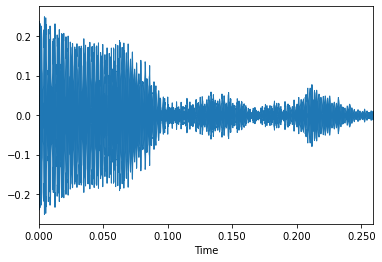

In [ ]:
fname_f = 'wav_file/mandarin2/mandarin2.wav' 

a = (9200000/10000000 + 0.0125)*(11000/11025)
b = (11800000/10000000 + 0.0125)*(11000/11025)

x, sr = librosa.load(fname_f, sr=6000, duration = b-a ,offset=a)
plt.figure()
librosa.display.waveplot(x, sr=sr)

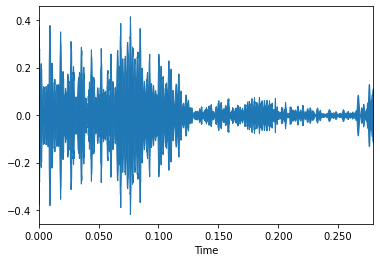

In [ ]:
fname_f = 'wav_file/mandarin3/mandarin3.wav' 

a = (9600000/10000000 + 0.0125)*(11000/11025)
b = (12400000/10000000 + 0.0125)*(11000/11025)

x, sr = librosa.load(fname_f, sr=6000, duration = b-a ,offset=a)
plt.figure()
librosa.display.waveplot(x, sr=sr)

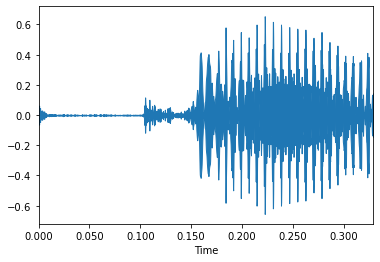

In [ ]:
fname_f = 'wav_file/korean1/korean1.wav' 

a = (19500000/10000000 + 0.0125)*(11000/11025)
b = (22800000/10000000 + 0.0125)*(11000/11025)

x, sr = librosa.load(fname_f, sr=6000, duration = b-a ,offset=a)
plt.figure()
librosa.display.waveplot(x, sr=sr)

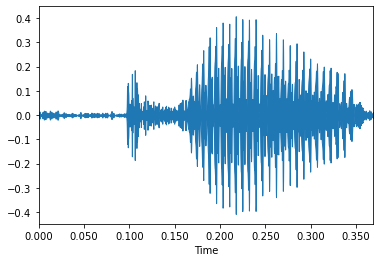

In [ ]:
fname_f = 'wav_file/korean17/korean17.wav' 

a = (13200000/10000000 + 0.0125)*(11000/11025)
b = (16900000/10000000 + 0.0125)*(11000/11025)

x, sr = librosa.load(fname_f, sr=6000, duration = b-a ,offset=a)
plt.figure()
librosa.display.waveplot(x, sr=sr)

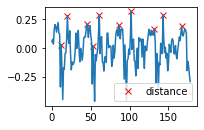

In [ ]:
#https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, peak_prominences

peaks, _ = find_peaks(x, prominence=prom)  
plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, peak_prominences

In [ ]:
def prom_crest_and_troughs(timeFrame, filename):
    SAMPLE_RATE = 44100
    fname_f = 'wav_file/{0}/{0}.wav'.format(filename)
    
#     DATA = np.ascontiguousarray(DATA

    startTime = timeFrame[0]
    endTime = timeFrame[1]
    startTime = (startTime/10000000 + 0.0125)*(11000/11025)
    endTime = (endTime/10000000 + 0.0125)*(11000/11025)
    duration = endTime - startTime

    x, sr = librosa.load(fname_f, sr=None, duration = duration, offset=startTime)
    if len(x) != 0:
        prom_num = max(x)
    else:
        prom_num = 0

    peaks, _ = find_peaks(x, prominence=prom_num)

    x_inverted = -x
    crests, _ = find_peaks(x_inverted, prominence=prom_num)

    x_peaks = peaks
    y_peaks = x[peaks]

    x_troughs = crests
    y_troughs = x[crests]

    return x_peaks, y_peaks, x_troughs, y_troughs


In [ ]:
def all_crest_and_troughs(timeFrame, filename):
    SAMPLE_RATE = 44100
    fname_f = 'wav_file/{0}/{0}.wav'.format(filename)

    startTime = timeFrame[0]
    endTime = timeFrame[1]
    startTime = (startTime/10000000 + 0.0125)*(11000/11025)
    endTime = (endTime/10000000 + 0.0125)*(11000/11025)
    duration = endTime - startTime

    x, sr = librosa.load(fname_f, sr=None, duration = duration ,offset=startTime)
    
    peaks, _ = find_peaks(x)

    x_inverted = -x
    crests, _ = find_peaks(x_inverted)

    x_peaks = peaks
    y_peaks = x[peaks]
    x_troughs = crests
    y_troughs = x[crests]

    return x_peaks, y_peaks, x_troughs, y_troughs


In [ ]:
transcript = "Please call Stella  Ask her to bring these things with her from the store Six spoons of fresh snow peas five thick slabs of blue cheese and maybe a snack for her brother Bob We also need a small plastic snake and a big toy frog for the kids She can scoop these things into three red bags and we will go meet her Wednesday at the train station"
words = transcript.split()
words[:5]

['Please', 'call', 'Stella', 'Ask', 'her']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
words_encoder = LabelBinarizer()
words_encoder.fit(words)
transformed = words_encoder.transform([words[2],words[1]])
# df_person = pd.concat([df_person, ohe_df], axis=1)

In [ ]:
transformed

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:

def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

def create_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.upper()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

def create_corpus_string(string_rc):
  # Remove all other punctuation
  string_rc = string_rc.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  string_rc = string_rc.upper()
  # Make it one long string to split by line
  lyrics = string_rc.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

In [ ]:
# Read the transcript from csv
dataset = pd.read_csv('transcript.csv', dtype=str)
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
dataset.head()

,transcript
0,Please call Stella Ask her to bring these thi...


In [ ]:
# Create the corpus using the 'transcript' column containing the transcript
corpus = create_corpus(dataset, 'transcript')
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus, num_words=100)
total_words = tokenizer.num_words


sequences = tokenizer.texts_to_sequences(dataset['transcript'])
one_hot_results = tokenizer.texts_to_matrix(dataset['transcript'], mode='binary')
word_index = tokenizer.word_index


In [ ]:
word_index["please"]

10

In [ ]:
from sklearn.preprocessing import LabelBinarizer
words_encoder = LabelBinarizer()
words_encoder.fit(words)
transformed = words_encoder.transform(words)

In [ ]:
transformed[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
!mkdir speakers_feature_data

mkdir: speakers_feature_data: File exists


In [ ]:
transformed

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
rs_phonemes

[[['P', 'L', 'IY1', 'Z'],
  ['K', 'AO1', 'L'],
  ['S', 'T', 'EH1', 'L', 'AH0'],
  ['AE1', 'S', 'K'],
  ['HH', 'ER0'],
  ['T', 'UW1'],
  ['B', 'R', 'IH1', 'NG'],
  ['DH', 'IY1', 'Z'],
  ['TH', 'IH1', 'NG', 'Z'],
  ['W', 'IH1', 'TH'],
  ['HH', 'ER0'],
  ['F', 'ER0', 'M'],
  ['DH', 'IY0'],
  ['S', 'T', 'AO1', 'R'],
  ['S', 'IH1', 'K', 'S'],
  ['S', 'P', 'UW1', 'N', 'Z'],
  ['AH0', 'V'],
  ['F', 'R', 'EH1', 'SH'],
  ['S', 'N', 'OW1'],
  ['P', 'IY1', 'Z'],
  ['F', 'AY1', 'V'],
  ['TH', 'IH1', 'K'],
  ['S', 'L', 'AE1', 'B', 'Z'],
  ['AH0', 'V'],
  ['B', 'L', 'UW1'],
  ['CH', 'IY1', 'Z'],
  ['AH0', 'N', 'D'],
  ['M', 'EY1', 'B', 'IY0'],
  ['AH0'],
  ['S', 'N', 'AE1', 'K'],
  ['F', 'AO1', 'R'],
  ['HH', 'ER0'],
  ['B', 'R', 'AH1', 'DH', 'ER0'],
  ['B', 'AA1', 'B'],
  ['W', 'IY1'],
  ['AO1', 'L', 'S', 'OW0'],
  ['N', 'IY1', 'D'],
  ['AH0'],
  ['S', 'M', 'AO1', 'L'],
  ['P', 'L', 'AE1', 'S', 'T', 'IH0', 'K'],
  ['S', 'N', 'EY1', 'K'],
  ['AH0', 'N', 'D'],
  ['AH0'],
  ['B', 'IH1', 'G'],
  ['T', 

In [ ]:
words

['Please',
 'call',
 'Stella',
 'Ask',
 'her',
 'to',
 'bring',
 'these',
 'things',
 'with',
 'her',
 'from',
 'the',
 'store',
 'Six',
 'spoons',
 'of',
 'fresh',
 'snow',
 'peas',
 'five',
 'thick',
 'slabs',
 'of',
 'blue',
 'cheese',
 'and',
 'maybe',
 'a',
 'snack',
 'for',
 'her',
 'brother',
 'Bob',
 'We',
 'also',
 'need',
 'a',
 'small',
 'plastic',
 'snake',
 'and',
 'a',
 'big',
 'toy',
 'frog',
 'for',
 'the',
 'kids',
 'She',
 'can',
 'scoop',
 'these',
 'things',
 'into',
 'three',
 'red',
 'bags',
 'and',
 'we',
 'will',
 'go',
 'meet',
 'her',
 'Wednesday',
 'at',
 'the',
 'train',
 'station']

In [ ]:
#hindi first
person_cnt = 1
for person in rs_phonemes:
    tracker = 0
    filename = "russian{0}".format(person_cnt)
    cnt = 0
    rows = []
    for word in words:
        word_tf = []
        search = word.lower()
        timeframes = rs_timeFrame_all[person_cnt-1][cnt]
        for i in timeframes:
            timeframe = [int(i[0]), int(i[1])]
            word_tf.append(timeframe)
        rows.append([search, person[cnt], word_tf, word_index[search], transformed[cnt]])
        cnt+=1
        
    df_person = pd.DataFrame(rows, columns=["word", "phonemes","word_timeframes","word_index", "word_vec"])
    df_person.head()
    
  #get average wavelength array for each word
    features = pd.DataFrame(columns=['wave_lengths','prom_crests_x', 'prom_crests_y','prom_troughs_x','prom_troughs_y'])
  # prom_crest_feature = pd.DataFrame(columns=['prom_crests'])
  # prom_trough_feature = pd.DataFrame(columns=['prom_troughs'])

    all_wavelength_av = []

    all_peak_x = []
    all_peak_y = []
    all_trough_x = []
    all_trough_y =[]

    prom_peak_x = []
    prom_peak_y = []
    prom_trough_x = []
    prom_trough_y =[]
    
    counter=0
    for index,timeframes in enumerate(df_person.word_timeframes):
        #get prominent crest/trough
        prom_word_peak_x = []
        prom_word_peak_y = []
        prom_word_trough_x = []
        prom_word_trough_y = []


            #get wavelength
        word_wavelength_av = []
        word_peak_x = []
        word_peak_y = []
        word_trough_x = []
        word_trough_y = []

        for timeframe in timeframes:
            #get prom. crest/trough
            x_prom_peaks, y_prom_peaks, x_prom_troughs, y_prom_troughs = prom_crest_and_troughs(timeframe, filename)
            prom_word_peak_x.append(x_prom_peaks)
            prom_word_peak_y.append(y_prom_peaks)
            prom_word_trough_x.append(x_prom_troughs)
            prom_word_trough_y.append(y_prom_troughs)

          #get wavelength
            x_peaks, y_peaks, x_troughs, y_troughs = all_crest_and_troughs(timeframe, filename)
            word_peak_x.append(x_peaks)
            word_peak_y.append(y_peaks)
            word_trough_x.append(x_troughs)
            word_trough_y.append(y_troughs)

            phoneme_wl_sum = 0
            endval = 0

            if(len(x_peaks)>len(x_troughs)):
                endval = len(x_troughs)
            elif (len(x_peaks)<len(x_troughs)):
                endval = len(x_peaks)
            else:
                endval = len(x_peaks)

            #find average of phonemes
            for i in range(0, endval-1):
                difference = abs(x_peaks[i]-x_troughs[i])
                phoneme_wl_sum += difference

            wl_av = phoneme_wl_sum/(endval-1)
            word_wavelength_av.append(wl_av)

#     all_wavelength_av.append(word_wavelength_av)
    #---datapoints of peaks and troughs
#     all_peak_x.append(word_peak_x)
#     all_peak_y.append(word_peak_y)
#     all_trough_x.append(word_trough_x)
#     all_trough_y.append(word_trough_y)

#     prom_peak_x.append(prom_word_peak_x)
#     prom_peak_y.append(prom_word_peak_y)
#     prom_trough_x.append(prom_word_trough_x)
#     prom_trough_y.append(prom_word_trough_y)

        features.loc[counter,'wave_lengths'] = word_wavelength_av
        features.loc[counter,'prom_crests_x'] = prom_word_peak_x
        features.loc[counter,'prom_crests_y'] = prom_word_peak_y
        features.loc[counter,'prom_troughs_x'] = prom_word_trough_x
        features.loc[counter,'prom_troughs_y'] = prom_word_trough_y
        tracker +=1
        counter+=1

    df_person = pd.concat([df_person,features],axis=1)

    export_path = 'speakers_feature_data/russian{0}.csv'.format(person_cnt)
    df_person.to_csv(export_path)
    person_cnt+=1
    print(tracker)

print(person_cnt)

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying 

69


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn

KeyboardInterrupt: 

In [ ]:
search

'.'

In [ ]:
len(prom_word_peak_y)

6

In [ ]:
len(prom_word_peak_x)

6

In [ ]:
cnt = 0
person = kr_phonemes[0]
rows = []
for word in words:
    word_tf = []
    search = word.lower()
    timeframes = kr_timeFrame_all[0][cnt]
    for i in timeframes:
        timeframe = [int(i[0]), int(i[1])]
        word_tf.append(timeframe)
    rows.append([search, person[cnt], word_tf, word_index[search], transformed[cnt]])
    cnt+=1

df_person_manual = pd.DataFrame(rows, columns=["word", "phonemes","word_timeframes","word_index", "word_vec"])
df_person_manual.head()

In [ ]:
#find wavelength

#finding all crest and troughs
all_peak_x = []
all_peak_y = []

all_trough_x = []
all_trough_y =[]

all_wavelength_av = []

counter=0
for index,timeframes in enumerate(df_person_manual.word_timeframes):
    word_peak_x = []
    word_peak_y = []
    word_trough_x = []
    word_trough_y = []

    word_wavelength_av = []


    for timeframe in timeframes:
      x_peaks, y_peaks, x_troughs, y_troughs = all_crest_and_troughs(timeframe, "korean1")
      word_peak_x.append(x_peaks)
      word_peak_y.append(y_peaks)
      word_trough_x.append(x_troughs)
      word_trough_y.append(y_troughs)
    
      phoneme_wl_sum = 0
      endval = 0

      if(len(x_peaks)>len(x_troughs)):
          endval = len(x_troughs)
      elif (len(x_peaks)<len(x_troughs)):
          endval = len(x_peaks)
      else:
          endval = len(x_peaks)

      #find average of phonemes
      for i in range(0, endval-1):
        difference = abs(x_peaks[i]-x_troughs[i])
        phoneme_wl_sum += difference
      
      wl_av = phoneme_wl_sum/(endval-1)
      word_wavelength_av.append(wl_av)

    all_wavelength_av.append(word_wavelength_av)

    #---datapoints of peaks and troughs
    all_peak_x.append(word_peak_x)
    all_peak_y.append(word_peak_y)
    all_trough_x.append(word_trough_x)
    all_trough_y.append(word_trough_y)

    counter+=1


print(counter)


69


In [ ]:
all_wavelength_av

[[2.2591036414565826,
  3.3636363636363638,
  2.174496644295302,
  2.0816326530612246],
 [2.8676470588235294, 4.092592592592593, 3.891891891891892],
 [1.9466666666666668,
  2.0,
  2.869565217391304,
  3.185185185185185,
  3.8636363636363638],
 [3.185185185185185, 3.037037037037037, 3.56],
 [2.26917510853835, 3.13953488372093],
 [3.2195121951219514, 3.40625],
 [4.873015873015873,
  2.7142857142857144,
  2.1233766233766236,
  1.8738738738738738],
 [2.5689655172413794, 2.072289156626506, 2.696629213483146],
 [3.0987654320987654,
  1.5454545454545454,
  1.8477157360406091,
  2.180451127819549],
 [3.7972972972972974, 2.1142857142857143, 1.6415094339622642],
 [2.4857142857142858, 2.8636363636363638],
 [1.8522727272727273, 3.4324324324324325, 2.962962962962963, 4.0],
 [5.117647058823529, 4.461538461538462],
 [1.8828125, 2.8133333333333335, 4.503401360544218, 1.9558823529411764],
 [2.1064220183486237, 2.409090909090909, 2.575, 1.644808743169399],
 [2.25,
  2.189873417721519,
  6.01515151515151

COMPLETED CONVERTING KOREAN FILE